In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import matplotlib.pyplot as plt

In [ ]:
# 1. Load dataset hasil preprocessing
df = pd.read_csv("Dataset Cyberbullying 1.csv")

In [ ]:
df.head()

,id,teks,label,clean_text,case_folding,tokenizing,stopwords,stemming,final_cleaning
0,1,"Kaka tidur yaa, udah pagi, gaboleh capek2",no,Kaka tidur yaa udah pagi gaboleh capek,kaka tidur yaa udah pagi gaboleh capek,"['kaka', 'tidur', 'yaa', 'udah', 'pagi', 'gabo...","['kaka', 'tidur', 'yaa', 'udah', 'pagi', 'gabo...","['kaka', 'tidur', 'yaa', 'udah', 'pagi', 'gabo...",kaka tidur yaa udah pagi gaboleh capek
1,2,makan nasi padang aja begini badannya,no,makan nasi padang aja begini badannya,makan nasi padang aja begini badannya,"['makan', 'nasi', 'padang', 'aja', 'begini', '...","['makan', 'nasi', 'padang', 'aja', 'badannya']","['makan', 'nasi', 'padang', 'aja', 'badan']",makan nasi padang aja badan
2,3,yang aku suka dari dia adalah selalu cukur jem...,yes,yang aku suka dari dia adalah selalu cukur jem...,yang aku suka dari dia adalah selalu cukur jem...,"['yang', 'aku', 'suka', 'dari', 'dia', 'adalah...","['suka', 'cukur', 'jembut', 'manggung']","['suka', 'cukur', 'jembut', 'manggung']",suka cukur jembut manggung
3,4,Hai kak Isyana aku ngefans banget sama kak Isy...,no,Hai kak Isyana aku ngefans banget sama kak Isy...,hai kak isyana aku ngefans banget sama kak isy...,"['hai', 'kak', 'isyana', 'aku', 'ngefans', 'ba...","['hai', 'kak', 'isyana', 'ngefans', 'banget', ...","['hai', 'kak', 'isyana', 'ngefans', 'banget', ...",hai kak isyana ngefans banget kak isyana suka ...
4,5,Manusia apa bidadari sih herann deh cantik ter...,no,Manusia apa bidadari sih herann deh cantik terus,manusia apa bidadari sih herann deh cantik terus,"['manusia', 'apa', 'bidadari', 'sih', 'herann'...","['manusia', 'bidadari', 'herann', 'deh', 'cant...","['manusia', 'bidadari', 'herann', 'deh', 'cant...",manusia bidadari herann deh cantik


In [ ]:
# 2. Pisahkan fitur (X) dan label (y)
X = df['final_cleaning']  # Ganti jika nama kolom teks berbeda
y = df['label']  # Ganti jika nama kolom label berbeda

# TF IDF

In [ ]:
# 3. TF-IDF di seluruh data
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)
feature_names = tfidf_vectorizer.get_feature_names_out()

In [ ]:
print(X_tfidf.shape)

(1050, 3310)


In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

tfidf_df

,aamiin,aammiinn,abai,abal,abang,abatartila,abbey,abege,abiis,abis,...,yra,yuhuu,yuk,yutub,yutuber,zaman,zholimi,zina,ziu,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Information Gain

In [ ]:
# 4. Feature selection menggunakan Information Gain
information_gain = mutual_info_classif(X_tfidf, y)

information_gain_df = pd.DataFrame({
    'feature': feature_names,
    'information_gain': information_gain
}).sort_values(by='information_gain', ascending=False)

# Hapus fitur dengan Information Gain nol
information_gain_df = information_gain_df[information_gain_df['information_gain'] > 0]

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warni

       feature  information_gain
47         aja          0.091078
566     cantik          0.072044
274     banget          0.064792
2318     orang          0.060894
3194  username          0.058038
956        gak          0.057971
1999      muka          0.051393
112       anak          0.048195
3152      udah          0.046909
1962      moga          0.039489
137     anjing          0.038471
1715      liat          0.037651
1442      kaya          0.036999
393        bgt          0.033965
2320       org          0.032865
2941      suka          0.031841
1464       kek          0.031278
1445     kayak          0.030414
173      artis          0.029094
1390       kak          0.025695


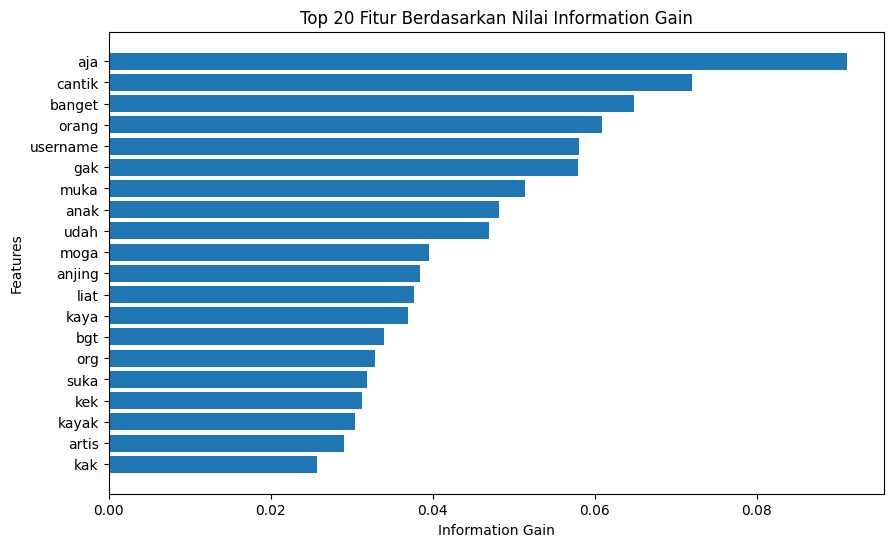

In [ ]:
# Visualisasi top 20 fitur
print(information_gain_df.head(20))

plt.figure(figsize=(10, 6))
plt.barh(information_gain_df['feature'][:20], information_gain_df['information_gain'][:20])
plt.xlabel('Information Gain')
plt.ylabel('Features')
plt.title('Top 20 Fitur Berdasarkan Nilai Information Gain')
plt.gca().invert_yaxis()
plt.show()

## Feature Selection

In [ ]:
# 5. Ambil top-N fitur
N = 200
top_features = information_gain_df['feature'].head(N).tolist()
top_indices = [tfidf_vectorizer.vocabulary_[f] for f in top_features if f in tfidf_vectorizer.vocabulary_]

In [ ]:
# 6. Ambil hanya fitur terpilih
X_selected = X_tfidf[:, top_indices].toarray()

# Evaluasi Model Random Forest

In [ ]:
# 7. K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Untuk confusion matrix total
all_true = []
all_pred = []

for fold, (train_index, val_index) in enumerate(kf.split(X_selected), start=1):
    X_train_fold, X_val_fold = X_selected[train_index], X_selected[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    ModelRF = RandomForestClassifier(n_estimators=500,max_depth=20, class_weight='balanced', random_state=42)
    ModelRF.fit(X_train_fold, y_train_fold)

    y_pred_fold = ModelRF.predict(X_val_fold)

    acc = accuracy_score(y_val_fold, y_pred_fold)
    prec = precision_score(y_val_fold, y_pred_fold, average='macro')
    rec = recall_score(y_val_fold, y_pred_fold, average='macro')
    f1 = f1_score(y_val_fold, y_pred_fold, average='macro')

    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    f1_scores.append(f1)

    all_true.extend(y_val_fold)
    all_pred.extend(y_pred_fold)

    print(f"Fold {fold} Results:")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1-score : {f1:.4f}")
    print("-" * 30)

Fold 1 Results:
  Accuracy : 0.7619
  Precision: 0.7681
  Recall   : 0.7619
  F1-score : 0.7605
------------------------------
Fold 2 Results:
  Accuracy : 0.8429
  Precision: 0.8446
  Recall   : 0.8422
  F1-score : 0.8424
------------------------------
Fold 3 Results:
  Accuracy : 0.7857
  Precision: 0.7865
  Recall   : 0.7867
  F1-score : 0.7857
------------------------------
Fold 4 Results:
  Accuracy : 0.8143
  Precision: 0.8172
  Recall   : 0.8156
  F1-score : 0.8142
------------------------------
Fold 5 Results:
  Accuracy : 0.8000
  Precision: 0.7998
  Recall   : 0.8005
  F1-score : 0.7998
------------------------------


In [ ]:
print("Average Results:")
print(f"Average Accuracy : {np.mean(accuracy_scores):.4f}")
print(f"Average Precision: {np.mean(precision_scores):.4f}")
print(f"Average Recall   : {np.mean(recall_scores):.4f}")
print(f"Average F1-score : {np.mean(f1_scores):.4f}")

Average Results:
Average Accuracy : 0.8010
Average Precision: 0.8032
Average Recall   : 0.8014
Average F1-score : 0.8005


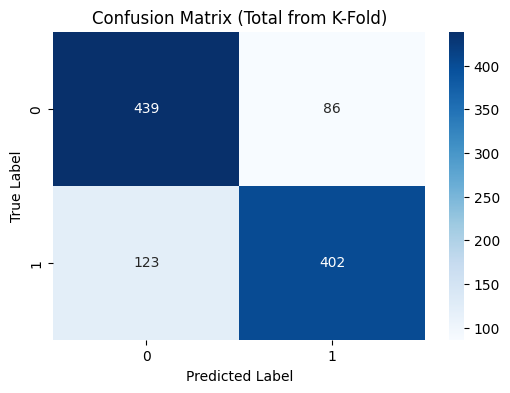

In [ ]:
# 8. Confusion Matrix Total
conf_matrix = confusion_matrix(all_true, all_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Total from K-Fold)')
plt.show()